In [1]:
## Preparing the tools

# we gonna use matplotlib ,pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# import model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


#model evaluation

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#spliting data into train and test sets 
np.random.seed(42)

#split
x=df.drop("target",axis=1)
y=df["target"]
#Split into train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [4]:
from sklearn.ensemble import AdaBoostClassifier

In [5]:
ada=AdaBoostClassifier()

ada.fit(x_train,y_train)

AdaBoostClassifier()

In [6]:
ada.score(x_test,y_test)

0.8032786885245902

In [7]:
#hyperparameter tuning for adabooster()

train_score=[]
test_score=[]

estimators=range(100,500,20)

ada=AdaBoostClassifier()

#loop through the different n_estimators

for i in estimators:
    ada.set_params(n_estimators=i)
    
    ada.fit(x_train,y_train)
    
    train_score.append(ada.score(x_train,y_train))
    
    test_score.append(ada.score(x_test,y_test))
        








In [8]:
train_score

[0.9628099173553719,
 0.9710743801652892,
 0.9834710743801653,
 0.9917355371900827,
 0.9958677685950413,
 0.9958677685950413,
 0.9958677685950413,
 0.9958677685950413,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [9]:
test_score

[0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7213114754098361,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7213114754098361,
 0.7377049180327869,
 0.7049180327868853,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

Maximum ada score on the test data: 77.05%


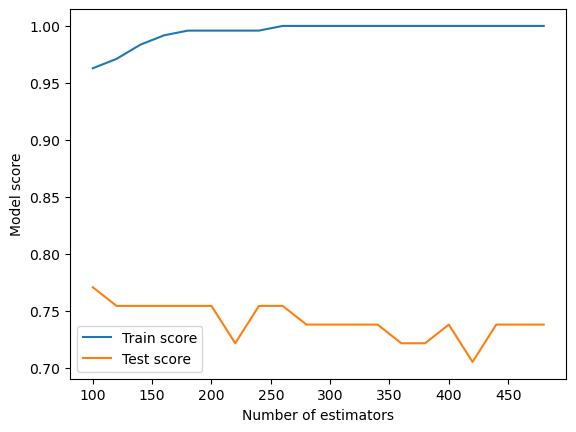

In [10]:
plt.plot(estimators, train_score, label="Train score")
plt.plot(estimators, test_score, label="Test score")
plt.xticks(np.arange(100,500,50))

plt.xlabel("Number of estimators")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum ada score on the test data: {max(test_score)*100:.2f}%")

In [11]:
ada.grid={"n_estimators":np.arange(10,150,20)
         ,"learning_rate":[0.1,0.5,1.0],
         "algorithm":["SAMME","SAMME.R"]
         ,"random_state":[None]}




In [12]:
#Tune Ada Booster

np.random.seed(42)


#Setup random hyperparameters search for  Adabooster
rs_ad=RandomizedSearchCV(AdaBoostClassifier(),param_distributions=ada.grid,cv=5,
                         n_iter=25,verbose=True)

rs_ad.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=25,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.1, 0.5, 1.0],
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130]),
                                        'random_state': [None]},
                   verbose=True)

In [13]:
rs_ad.best_params_

{'random_state': None,
 'n_estimators': 50,
 'learning_rate': 1.0,
 'algorithm': 'SAMME'}

In [14]:
rs_ad.score(x_test,y_test)

0.819672131147541

In [17]:
#Tune adabooster

np.random.seed(42)

#Setup random hyperparameters search for adabooster
gs_ad=GridSearchCV(AdaBoostClassifier(),param_grid=ada.grid,cv=5,
                      verbose=True)

#Fit random hyperparamter search model
gs_ad.fit(x_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130]),
                         'random_state': [None]},
             verbose=True)

In [18]:
gs_ad.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [21]:
gs_ad.score(x_test,y_test)

0.819672131147541

In [41]:
#roc
# make prediction with tuned model

y_preds =gs_ad.predict(x_test)

In [42]:
from sklearn.metrics import RocCurveDisplay


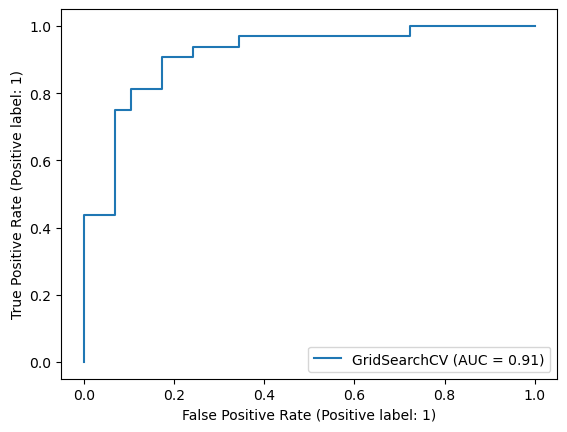

In [44]:
RocCurveDisplay.from_estimator(gs_ad,x_test,y_test)

In [45]:
#confusion matrix
print(confusion_matrix(y_test,y_preds))

[[26  3]
 [ 8 24]]


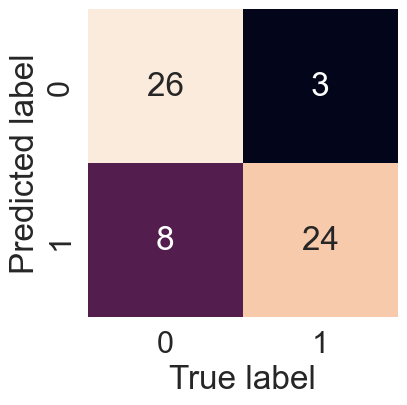

In [51]:
sns.set(font_scale=2)

def plot_conf_mat(y_test,y_preds):
    
    fig,ax=plt.subplots(figsize=(4,4))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,y_preds)

In [52]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



# Now  lets focus on the gradient boosting


In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()

In [22]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [23]:
gbc.score(x_test,y_test)

0.7704918032786885

In [63]:
#hyperparameter tuning for adabooster()

train_score=[]
test_score=[]

estimator=range(50,200,10)

gbc=GradientBoostingClassifier()

#loop through the different n_estimators

for i in estimator:
    gbc.set_params(n_estimators=i)
    
    gbc.fit(x_train,y_train)
    
    train_score.append(ada.score(x_train,y_train))
    
    test_score.append(ada.score(x_test,y_test))
        

In [67]:
 train_score

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [68]:
test_score

[0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

Maximum ada score on the test data: 73.77%


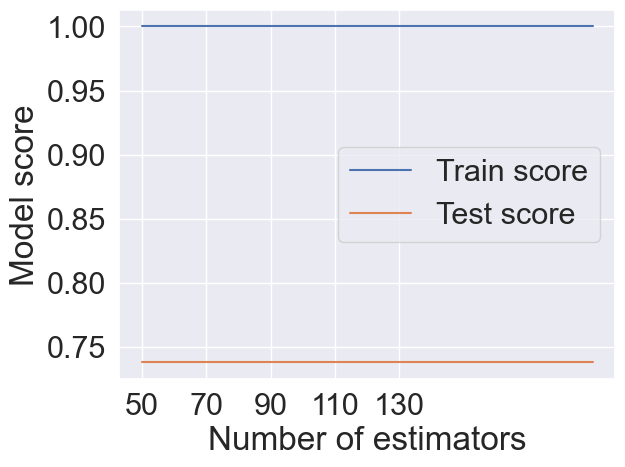

In [70]:
plt.plot(estimator, train_score, label="Train score")
plt.plot(estimator, test_score, label="Test score")
plt.xticks(np.arange(50,150,20))

plt.xlabel("Number of estimators")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum ada score on the test data: {max(test_score)*100:.2f}%")

In [24]:
gbc1=GradientBoostingClassifier(max_depth=2,n_estimators=5,learning_rate=1.0)


In [25]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [27]:
gbc.score(x_test,y_test)


0.7704918032786885

In [42]:
gbc.grid={"n_estimators":np.arange(10,100,10)
         ,"learning_rate":[0.1,0.5,0.25,1.0],
         "min_samples_split":np.arange(12,20,2),
         "min_samples_leaf":np.arange(1,10,2)
         ,"max_depth":np.arange(3,7,1)}


In [46]:
#Tune Gradient Classifer

np.random.seed(42)

#Setup random hyperparameters search for Gradient Classifier
rs_gbc=RandomizedSearchCV(GradientBoostingClassifier(),param_distributions=gbc.grid,cv=5,
                         n_iter=15,verbose=True)

#Fit random hyperparamter search model
rs_gbc.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=15,
                   param_distributions={'learning_rate': [0.1, 0.5, 0.25, 1.0],
                                        'max_depth': array([3, 4, 5, 6]),
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [47]:
rs_gbc.best_params_

{'n_estimators': 30,
 'min_samples_split': 18,
 'min_samples_leaf': 3,
 'max_depth': 4,
 'learning_rate': 0.25}

In [48]:
rs_gbc.score(x_test,y_test)

0.8032786885245902

In [79]:
rs_gbc.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 6,
 'learning_rate': 0.25}

In [80]:
rs_gbc.score(x_test,y_test)

0.9180327868852459

In [82]:
rs_gbc.best_params_

{'n_estimators': 190,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 5,
 'learning_rate': 0.1}

In [83]:
rs_gbc.score(x_test,y_test)

0.7868852459016393

In [85]:
rs_gbc.best_params_

{'n_estimators': 70,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 4,
 'learning_rate': 0.1}

In [86]:
rs_gbc.score(x_test,y_test)

0.8688524590163934

In [89]:
abc=GradientBoostingClassifier(n_estimators= 190,
 min_samples_split= 10,
 min_samples_leaf= 5,
 max_depth= 5,
 learning_rate= 0.1)

In [91]:
abc.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=5,
                           min_samples_split=10, n_estimators=190)

In [92]:
abc.score(x_test,y_test)

0.7868852459016393

In [94]:
rs_gbc.best_params_

{'n_estimators': 70,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 4,
 'learning_rate': 0.1}

In [95]:
rs_gbc.score(x_test,y_test)

0.8688524590163934

In [96]:
abc=GradientBoostingClassifier(n_estimators=10,
 min_samples_split= 4,
 min_samples_leaf = 19,
 max_depth = 6,
 learning_rate = 0.25)

In [99]:
abc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.25, max_depth=6, min_samples_leaf=19,
                           min_samples_split=4, n_estimators=10)

In [100]:
abc.score(x_test,y_test)

0.819672131147541

In [102]:
rs_gbc.best_params_

{'n_estimators': 190,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 5,
 'learning_rate': 0.1}

In [103]:
rs_gbc.score(x_test,y_test)

0.7868852459016393

In [106]:
#Tune Logistic  Regression

np.random.seed(42)

#Setup random hyperparameters search for Logistic Regression
gs_gbc=GridSearchCV(GradientBoostingClassifier(),param_grid=gbc.grid,cv=2,
                      verbose=True)

#Fit random hyperparamter search model
gs_gbc.fit(x_train,y_train)

Fitting 2 folds for each of 17280 candidates, totalling 34560 fits


KeyboardInterrupt: 

In [110]:
#Tune Gradient Classifer

np.random.seed(42)

#Setup random hyperparameters search for Gradient Classifier
rs_gbc=RandomizedSearchCV(GradientBoostingClassifier(),param_distributions=gbc.grid,cv=5,
                         n_iter=25,verbose=True)

#Fit random hyperparamter search model
rs_gbc.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=25,
                   param_distributions={'learning_rate': [0.1, 0.5, 0.25, 1.0],
                                        'max_depth': array([3, 4, 5, 6]),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230])},
                   verbose=True)

In [108]:
rs_gbc.best_params_

{'n_estimators': 70,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 4,
 'learning_rate': 0.1}

In [109]:
rs_gbc.score(x_test,y_test)

0.8688524590163934

In [111]:
rs_gbc.best_params_

{'n_estimators': 70,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 4,
 'learning_rate': 0.1}

In [112]:
rs_gbc.score(x_test,y_test)

0.8688524590163934

In [125]:
#{'n_estimators': 10,
# 'min_samples_split': 4,
 #'min_samples_leaf': 19,
# 'max_depth': 6,
# 'learning_rate': 0.25}
atc_grid={"n_estimators":[10]
         ,"learning_rate":[0.5,0.25],
         "min_samples_split"[4,5,6],
         "min_samples_leaf":[15,20,1]
         ,"max_depth":np.arange(3,6,1)}

SyntaxError: ':' expected after dictionary key (4152200995.py, line 8)

In [122]:
#Tune Gradient Classifer

np.random.seed(42)

#Setup random hyperparameters search for Gradient Classifier
rs_gbc1=RandomizedSearchCV(GradientBoostingClassifier(),param_distributions=atc_grid,cv=5,
                         n_iter=30,verbose=True)

#Fit random hyperparamter search model
rs_gbc1.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=30,
                   param_distributions={'learning_rate': [0.1, 0.5, 0.25, 1.0],
                                        'max_depth': array([3, 4, 5]),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([15, 16, 17, 18, 19]),
                                        'n_estimators': array([10, 12, 14, 16, 18])},
                   verbose=True)

In [117]:
rs_gbc1.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 3,
 'learning_rate': 0.5}

In [118]:
rs_gbc1.score(x_test,y_test)

0.8524590163934426

In [120]:
rs_gbc1.best_params_

{'n_estimators': 16,
 'min_samples_split': 15,
 'min_samples_leaf': 9,
 'max_depth': 4,
 'learning_rate': 1.0}

In [121]:
rs_gbc1.score(x_test,y_test)

0.7540983606557377

In [123]:
rs_gbc1.best_params_

{'n_estimators': 14,
 'min_samples_split': 19,
 'min_samples_leaf': 19,
 'max_depth': 5,
 'learning_rate': 0.1}

In [124]:
rs_gbc1.score(x_test,y_test)

0.8688524590163934